In [1]:
import numpy as np
import pyrem as pr

In [27]:
a = np.random.rand(3000)
b = np.ones(128)

In [15]:
a

array([5.88829676e-01, 1.93121780e-01, 7.30572489e-01, 8.32982042e-01,
       6.63066727e-01, 4.19252925e-01, 6.22843216e-01, 7.85363573e-01,
       2.00550007e-01, 1.61993012e-01, 6.04594390e-01, 3.15486364e-01,
       7.62880484e-02, 6.78619323e-01, 5.03282861e-01, 5.63121980e-01,
       3.73144235e-01, 8.09544457e-01, 5.59483204e-01, 9.34103544e-01,
       2.04465820e-01, 5.78047904e-01, 5.12956679e-01, 1.96477151e-01,
       3.13827607e-01, 5.90643166e-01, 2.70538756e-01, 1.47935581e-01,
       6.46823568e-01, 6.45215396e-01, 3.17402897e-01, 5.24434590e-01,
       3.07371351e-01, 4.93746600e-01, 6.27249265e-01, 1.32580421e-01,
       9.55237030e-01, 2.55518035e-02, 3.33389908e-01, 5.53787018e-01,
       2.11776092e-01, 5.76218805e-01, 3.69584433e-01, 4.27655973e-01,
       2.89302482e-01, 5.35731535e-01, 5.58698250e-01, 8.89200320e-01,
       7.35227009e-01, 3.52141014e-01, 5.10632384e-01, 2.71275514e-01,
       2.93457180e-01, 4.63612989e-01, 6.04508464e-01, 9.91615408e-01,
      

In [ ]:
b

In [ ]:
def calculateStandardDeviation(a):
    return np.std(a)
calculateStandardDeviation(a)

In [ ]:
c = np.random.normal(size=int(1e6))

In [ ]:
#suppose EEG data mean very close to 0, from http://gilestrolab.github.io/pyrem/_modules/pyrem/univariate.html
def calculateHjorth(a):
    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)
    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)
    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity
    return activity, morbidity, complexity
calculateHjorth(c)

In [ ]:
# confused by term 'slide window' in the paper
def calculateMMD(a):
    return np.max(a) - np.min(a) # only one dimention

In [ ]:
#Petrosian Fractal Dimension, complexity
def calculatePFD(a):
    N = len(a)
    diff = np.ediff1d(a)
    sign_change = (diff[1:-1] * diff[0:-2] < 0)
    M = sign_change.sum()
    return np.log10(N) / (np.log10(N) + np.log10(N / (N + 0.4 * M)))
calculatePFD(a)

In [ ]:
#using Katz fractal dimension instead of Normalized Line Length (NLL)
def calculateKFD(a):
    distance = np.abs(np.ediff1d(a))
    LL = distance.sum() #'line length'
    LL_normalized = np.log10(np.divide(LL, distance.mean())) #original paper uses constant hyperparameter M=1
    aux_d = a - a[0]
    d = np.max(np.abs(aux_d[1:]))
    return np.divide(LL_normalized, np.add(LL_normalized, np.log10(np.divide(d, LL))))

print(calculateNLL(c))
print(calculateNLL_(c))

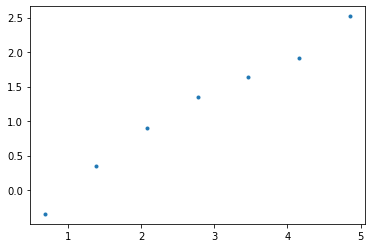

0.640773699188716
[128, 64, 32, 16, 8, 4, 2]
[nan, 0.651741254103972, 0.6283531679928849, 0.6318084528696455, 0.610728196370235, 0.6393880148921297, 0.6366107144466471]
[ 0.00408709 -0.46722759]
0.008174174528921626


In [25]:
import matplotlib.pyplot as plt

#Hurst Exponent
def getLags(arr_len):
    if arr_len == 3000:
        return [3000, 1500, 750, 250, 125, 60, 30, 15, 8, 4, 2]
    else:
        return [2**x for x in range(int(np.log2(arr_len)+1))][::-1][:-1]

def calculateHurstExponent(a):
    alen = len(a)
    if alen < 100:
        raise f"Not enough datapoints to calculate Hurst Exp | Only {alen} of the required 100."
    lags = getLags(alen)
    
    ln_lag_ls = []
    ln_Rs_ls = []
    for i, lag in enumerate(lags):
        chunk = a.reshape(-1, lag)
        
        chunk_mean = np.mean(chunk, axis=1, dtype=np.float32, keepdims=True)
        chunk_std = np.std(chunk, axis=1, dtype=np.float32, ddof=1) # Sample Standard deviation
        chunk_mean_centered = np.subtract(chunk, chunk_mean)
        cum_sum = np.cumsum(chunk_mean_centered, axis=1, dtype=np.float32)
        
        R = np.max(cum_sum, axis=1) - np.min(cum_sum, axis=1)
        Rs = np.divide(R, chunk_std)
        avg_Rs = np.mean(Rs)
        
        ln_lag_ls.append(np.log(lag))
        ln_Rs_ls.append(np.log(avg_Rs))
#     print("x\n", ln_lag_ls)
#     print("y\n", ln_Rs_ls)
    _ = plt.plot(ln_lag_ls, ln_Rs_ls, '.')
    plt.show()
    m, c = np.polyfit(ln_lag_ls,ln_Rs_ls,1)
    return m



# test = np.array([0.04, 0.02, 0.05, 0.08, 0.02, -0.17, 0.05, 0.00]) # Hurst Exponent should be ~0.87
# print(calculateHurstExponent(test)) 

print(calculateHurstExponent(a))

def testlala(ts):
    alen = len(a)
    lags = getLags(alen)
    print(lags)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    print(tau)
    poly = np.polyfit(np.log(lags)[1:], np.log(tau)[1:], 1)
    print(poly)
    return poly[0]*2.0

print(testlala(a))

In [ ]:
#Log Root Sum of Sequential Variations
#measure the sequential variations
def calculateLRSSV(a):
    diff = np.ediff1d(a)
    return np.log10(np.sqrt(np.sum(diff**2)))

calculateLRSSV(b)

In [ ]:
#Normalized Spectral Entropy, https://raphaelvallat.com/entropy/build/html/_modules/entropy/entropy.html
from scipy.signal import periodogram
def calculateSE(a):
    _, psd = periodogram(a, 100)  #fft transform
    psd_norm = np.divide(psd, psd.sum()) #power spectral density, measure of signal's power content versus frequency
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    se /= np.log2(psd_norm.size)
    return se
calculateSE(a)

In [ ]:
#Rényi entropy (RE) a measure of the entropy of the distribution P = (p1, p2,..., pn)
def calculateRE(a, m=2):
    return 1/(1-m) * np.log2(np.sum(a**m))
calculateRE(b)

In [29]:
from scipy.special import digamma
#Kraskov entropy (KE) an estimate for Shannon entropy using N samples of an m-dimensional random vector x
#very confused???
def calculateKE(a):
    N = len(a)
    k = int(np.sqrt(N)) # sqrt of epoch len (3000)
    sum_ = 0
    for i in range(len(a)):
        kth_nearest = sorted(sorted(a, key = lambda n: abs(a[i]-n))[:k])[-1]
        ri = np.abs(kth_nearest - a[i])
        if ri!=0:
            sum_ += np.log(2*ri)
    
    
    return digamma(N) - digamma(k) + 1/N * sum_
calculateKE(a)

-0.040031393618887634